In [118]:
import pandas as pd

from sklearn import preprocessing

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

from bokeh.plotting import figure, ColumnDataSource, output_notebook, output_file, show, save 
from bokeh.models import HoverTool, WheelZoomTool, PanTool, BoxZoomTool, ResetTool, TapTool, SaveTool
from bokeh.palettes import brewer
output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

import colo

Loading BokehJS ...

In [169]:
# Input - type the file name
file = 'Data_V2.csv'

# loads the data
df1 = pd.read_csv(file)

# Prints the sheet names
#print(x1.sheet_names)

# Selects the sheet store
#df1 = x1.parse('Total Data Set')

In [98]:
# displays the data
df1

System  lattice_a  lattice_b  lattice_c       alfa       beta  \
0       KCaO3   3.527159   4.054563   3.602487  91.497245  91.347537   
1       KCaO3   4.370598   4.130360   3.765074  90.682515  89.993410   
2       KCaO3   4.120714   4.140331   4.419631  89.804943  90.637325   
3       KCaO3   4.353036   3.584981   4.159995  92.044500  85.343010   
4       KCaO3   4.079323   4.360621   4.015184  87.209892  89.070987   
5       KCaO3   4.170776   4.204498   4.068904  89.329520  92.828304   
6       KCaO3   4.299240   4.265504   4.405869  84.888087  89.647767   
7       KCaO3   4.183527   4.221944   4.467955  86.181910  91.991502   
8       KCaO3   4.364258   3.954661   4.365109  94.877078  93.077299   
9       KCaO3   4.323906   3.761407   4.442354  90.071386  86.630310   
10      KCaO3   4.245876   3.626097   4.200420  85.361726  88.848949   
11      KCaO3   3.561808   4.166721   3.924811  91.782341  89.779342   
12      KCaO3   3.688416   4.387753   4.075468  90.234250  92.480072   
13      KCaO3   4.380090   3.903703   3.576067  89.352451  86.855758   
14      KCaO3   3.686888   3.771532   3.849612  89.985434  94.565937   
15      KCaO3   4.205356   4.022654   4.192363  89.497913  93.385353   
16      KCaO3   4.134676   3.935227   3.796115  84.693596  88.746714   
17      KCaO3   4.112981   4.254790   4.314675  90.272244  94.128727   
18      KCaO3   4.179594   3.951478   4.300237  84.394572  87.321412   
19      KCaO3   3.893871   4.329304   3.970576  90.224458  91.259099   
20      KCaO3   4.196676   4.199170   3.777354  88.360192  93.782013   
21      KCaO3   3.959600   3.691663   3.905871  92.628532  90.750851   
22      KCaO3   3.996775   4.478948   3.902399  86.616409  92.239316   
23      KCaO3   4.081458   3.614467   4.415963  90.726469  89.239664   
24      KCaO3   4.087269   3.767005   3.945731  90.990016  89.540882   
25      KCaO3   3.789703   3.552232   4.199416  86.976539  95.017630   
26      KCaO3   3.574504   4.011244   3.978576  87.609517  88.389248   
27      KCaO3   3.948074   4.445117   3.621253  84.015942  93.114894   
28      KCaO3   4.005712   4.372336   3.843901  91.101180  93.352845   
29      KCaO3   3.857430   4.250736   4.421427  87.121376  85.580769   
...       ...        ...        ...        ...        ...        ...   
53061  SrZrO3   3.663341   3.655041   3.805221  88.754081  88.638117   
53062  SrZrO3   4.175786   4.366389   3.685232  87.201439  91.116280   
53063  SrZrO3   3.761163   3.864868   3.745083  91.602742  87.864494   
53064  SrZrO3   4.221810   4.132450   3.771883  90.544790  89.595578   
53065  SrZrO3   4.302843   3.817545   4.407316  84.114971  86.487215   
53066  SrZrO3   4.032988   3.530228   4.123489  92.037741  89.657105   
53067  SrZrO3   4.263889   4.225108   3.541455  93.523253  87.708500   
53068  SrZrO3   4.129061   4.368406   4.456059  89.257346  95.071700   
53069  SrZrO3   3.978755   4.271922   4.425686  85.923490  91.961857   
53070  SrZrO3   4.257833   3.656973   3.981767  91.529602  90.714715   
53071  SrZrO3   4.419419   4.218762   3.562293  94.270883  87.267789   
53072  SrZrO3   3.702985   4.243516   3.622819  89.510733  85.319093   
53073  SrZrO3   3.695236   3.565160   3.717974  86.887893  90.019565   
53074  SrZrO3   4.021099   4.382556   4.077413  90.977490  95.063577   
53075  SrZrO3   4.365831   3.682767   3.919525  87.431276  86.649929   
53076  SrZrO3   3.736577   4.249708   4.429452  90.973640  90.448789   
53077  SrZrO3   4.266698   4.405709   3.852486  88.463515  87.171115   
53078  SrZrO3   4.275570   4.291863   4.246733  86.891729  87.820161   
53079  SrZrO3   4.418856   3.937491   3.663181  84.325736  89.196292   
53080  SrZrO3   3.683866   3.968172   4.370306  86.913877  87.159409   
53081  SrZrO3   3.953406   3.938683   3.765448  86.870158  89.570842   
53082  SrZrO3   4.151391   4.437386   3.844316  91.073660  87.655539   
53083  SrZrO3   4.014995   3.901216   3.645489  88.453155  87.523116   
53084  SrZrO3   4.099162   3.566612   4.009709 

In [99]:
# Checks the number of values for each sample
for i, value in enumerate(df1['System'].unique()):
    count = len(df1[df1.System == value])
    print(f'{i} {value} number of index = {count}')

0 KCaO3 number of index = 1000
1 KCoO3 number of index = 1000
2 KCrO3 number of index = 1000
3 KCuO3 number of index = 1000
4 KFeO3 number of index = 1000
5 KHfO3 number of index = 1000
6 KMgO3 number of index = 1000
7 KMnO3 number of index = 1000
8 KMoO3 number of index = 1000
9 KNbO3 number of index = 1000
10 KNiO3 number of index = 1000
11 KPbO3 number of index = 1000
12 KScO3 number of index = 1000
13 KSnO3 number of index = 1000
14 KTiO3 number of index = 1000
15 KVO3 number of index = 1000
16 KZnO3 number of index = 1000
17 KZrO3 number of index = 1000
18 NaCaO3 number of index = 1000
19 NaCoO3 number of index = 1000
20 NaCrO3 number of index = 1000
21 NaCuO3 number of index = 1000
22 NaFeO3 number of index = 1000
23 NaHfO3 number of index = 1000
24 NaMgO3 number of index = 1000
25 NaMnO3 number of index = 1000
26 NaMoO3 number of index = 1000
27 NaNbO3 number of index = 1000
28 NaNiO3 number of index = 1000
29 NaPbO3 number of index = 1000
30 NaScO3 number of index = 1000
31 NaS

In [100]:
# Converts the text labels into examples
encoder = LabelEncoder()
encoder.fit(df1['System'])
encoded_labels = encoder.transform(df1['System'])

# convert integers to dummy variables (i.e. one hot encoded)
labels = np_utils.to_categorical(encoded_labels)

# Collects the data for the samples
samples = df1.as_matrix(columns=df1.columns[1:38])

# Standard scaler to the raw data
samples_scaled=StandardScaler().fit_transform(samples)

In [101]:
# Removes any incomplete systems
df1 = df1.drop(df1[df1.System=='SrCaO3'].index)

In [102]:
#N.B. this assumes all of the a lattice values are unique

# Selects a random sampling of the data
random_ind = np.random.randint(0, df1['lattice_a'].unique().shape[0]-1, size=200)

# Chooses thouse values
random_selection = df1['lattice_a'].unique()[random_ind]

# Builds the Test and training set
test_ind = df1.loc[df1['lattice_a'].isin(random_selection)].index
train_ind = df1.loc[~df1['lattice_a'].isin(random_selection)].index

In [154]:
# First small model

# establishes the model
model = Sequential()

# Dense layer size 64, # input dimensions based on the size of the input data
model.add(Dense(512, input_dim=37))
#model.add(Dropout(0.5))

# Dense layer size 32
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))

# Dense layer size 32
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5)

# Dense layer size 16
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

# Dense layer size 16
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

# Dense layer size 8
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))

# Dense softmax layer for classification
model.add(Dense(54, activation='softmax'))



# Compiles the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

#model.optimizer.lr=1e-4
hist = model.fit(samples_scaled[train_ind], labels[train_ind], epochs=1000, 
             batch_size=53091, validation_data = (samples_scaled[test_ind],labels[test_ind]),
                callbacks=[tbCallBack])

Train on 43354 samples, validate on 9646 samples
Epoch 1/1000
43354/43354 [==============================] - 0s - loss: 0.1538 - acc: 0.9586 - val_loss: 4.9163 - val_acc: 0.4200
Epoch 2/1000
43354/43354 [==============================] - 0s - loss: 0.1535 - acc: 0.9587 - val_loss: 4.9192 - val_acc: 0.4203
Epoch 3/1000
43354/43354 [==============================] - 0s - loss: 0.1532 - acc: 0.9587 - val_loss: 4.9226 - val_acc: 0.4201
Epoch 4/1000
43354/43354 [==============================] - 0s - loss: 0.1529 - acc: 0.9589 - val_loss: 4.9254 - val_acc: 0.4200
Epoch 5/1000
43354/43354 [==============================] - 0s - loss: 0.1526 - acc: 0.9589 - val_loss: 4.9279 - val_acc: 0.4203
Epoch 6/1000
43354/43354 [==============================] - 0s - loss: 0.1523 - acc: 0.9591 - val_loss: 4.9315 - val_acc: 0.4199
Epoch 7/1000
43354/43354 [==============================] - 0s - loss: 0.1520 - acc: 0.9591 - val_loss: 4.9346 - val_acc: 0.4201
Epoch 8/1000
43354/43354 [======================

43354/43354 [==============================] - 0s - loss: 0.1374 - acc: 0.9634 - val_loss: 5.0899 - val_acc: 0.4205
Epoch 64/1000
43354/43354 [==============================] - 0s - loss: 0.1371 - acc: 0.9635 - val_loss: 5.0938 - val_acc: 0.4204
Epoch 65/1000
43354/43354 [==============================] - 0s - loss: 0.1369 - acc: 0.9637 - val_loss: 5.0957 - val_acc: 0.4205
Epoch 66/1000
43354/43354 [==============================] - 0s - loss: 0.1366 - acc: 0.9636 - val_loss: 5.0983 - val_acc: 0.4206
Epoch 67/1000
43354/43354 [==============================] - 0s - loss: 0.1364 - acc: 0.9637 - val_loss: 5.1022 - val_acc: 0.4199
Epoch 68/1000
43354/43354 [==============================] - 0s - loss: 0.1361 - acc: 0.9637 - val_loss: 5.1041 - val_acc: 0.4201
Epoch 69/1000
43354/43354 [==============================] - 0s - loss: 0.1359 - acc: 0.9637 - val_loss: 5.1069 - val_acc: 0.4200
Epoch 70/1000
43354/43354 [==============================] - 0s - loss: 0.1356 - acc: 0.9638 - val_loss:

43354/43354 [==============================] - 0s - loss: 0.1236 - acc: 0.9674 - val_loss: 5.2529 - val_acc: 0.4205
Epoch 126/1000
43354/43354 [==============================] - 0s - loss: 0.1235 - acc: 0.9673 - val_loss: 5.2549 - val_acc: 0.4203
Epoch 127/1000
43354/43354 [==============================] - 0s - loss: 0.1233 - acc: 0.9675 - val_loss: 5.2572 - val_acc: 0.4203
Epoch 128/1000
43354/43354 [==============================] - 0s - loss: 0.1231 - acc: 0.9675 - val_loss: 5.2585 - val_acc: 0.4204
Epoch 129/1000
43354/43354 [==============================] - 0s - loss: 0.1229 - acc: 0.9674 - val_loss: 5.2605 - val_acc: 0.4204
Epoch 130/1000
43354/43354 [==============================] - 0s - loss: 0.1227 - acc: 0.9677 - val_loss: 5.2621 - val_acc: 0.4205
Epoch 131/1000
43354/43354 [==============================] - 0s - loss: 0.1226 - acc: 0.9676 - val_loss: 5.2644 - val_acc: 0.4205
Epoch 132/1000
43354/43354 [==============================] - 0s - loss: 0.1224 - acc: 0.9677 - va

43354/43354 [==============================] - 0s - loss: 0.1134 - acc: 0.9709 - val_loss: 5.3668 - val_acc: 0.4209
Epoch 188/1000
43354/43354 [==============================] - 0s - loss: 0.1132 - acc: 0.9709 - val_loss: 5.3663 - val_acc: 0.4212
Epoch 189/1000
43354/43354 [==============================] - 0s - loss: 0.1131 - acc: 0.9711 - val_loss: 5.3692 - val_acc: 0.4209
Epoch 190/1000
43354/43354 [==============================] - 0s - loss: 0.1129 - acc: 0.9709 - val_loss: 5.3715 - val_acc: 0.4212
Epoch 191/1000
43354/43354 [==============================] - 0s - loss: 0.1128 - acc: 0.9712 - val_loss: 5.3720 - val_acc: 0.4209
Epoch 192/1000
43354/43354 [==============================] - 0s - loss: 0.1126 - acc: 0.9713 - val_loss: 5.3751 - val_acc: 0.4210
Epoch 193/1000
43354/43354 [==============================] - 0s - loss: 0.1125 - acc: 0.9712 - val_loss: 5.3761 - val_acc: 0.4211
Epoch 194/1000
43354/43354 [==============================] - 0s - loss: 0.1123 - acc: 0.9713 - va

43354/43354 [==============================] - 0s - loss: 0.1044 - acc: 0.9737 - val_loss: 5.4727 - val_acc: 0.4204
Epoch 250/1000
43354/43354 [==============================] - 0s - loss: 0.1043 - acc: 0.9737 - val_loss: 5.4757 - val_acc: 0.4201
Epoch 251/1000
43354/43354 [==============================] - 0s - loss: 0.1041 - acc: 0.9738 - val_loss: 5.4762 - val_acc: 0.4204
Epoch 252/1000
43354/43354 [==============================] - 0s - loss: 0.1040 - acc: 0.9738 - val_loss: 5.4779 - val_acc: 0.4202
Epoch 253/1000
43354/43354 [==============================] - 0s - loss: 0.1038 - acc: 0.9738 - val_loss: 5.4813 - val_acc: 0.4199
Epoch 254/1000
43354/43354 [==============================] - 0s - loss: 0.1037 - acc: 0.9741 - val_loss: 5.4808 - val_acc: 0.4203
Epoch 255/1000
43354/43354 [==============================] - 0s - loss: 0.1036 - acc: 0.9740 - val_loss: 5.4834 - val_acc: 0.4203
Epoch 256/1000
43354/43354 [==============================] - 0s - loss: 0.1034 - acc: 0.9740 - va

43354/43354 [==============================] - 0s - loss: 0.0963 - acc: 0.9768 - val_loss: 5.5658 - val_acc: 0.4199
Epoch 312/1000
43354/43354 [==============================] - 0s - loss: 0.0962 - acc: 0.9769 - val_loss: 5.5663 - val_acc: 0.4202
Epoch 313/1000
43354/43354 [==============================] - 0s - loss: 0.0961 - acc: 0.9769 - val_loss: 5.5676 - val_acc: 0.4198
Epoch 314/1000
43354/43354 [==============================] - 0s - loss: 0.0960 - acc: 0.9770 - val_loss: 5.5698 - val_acc: 0.4202
Epoch 315/1000
43354/43354 [==============================] - 0s - loss: 0.0958 - acc: 0.9770 - val_loss: 5.5716 - val_acc: 0.4202
Epoch 316/1000
43354/43354 [==============================] - 0s - loss: 0.0957 - acc: 0.9770 - val_loss: 5.5733 - val_acc: 0.4199
Epoch 317/1000
43354/43354 [==============================] - 0s - loss: 0.0956 - acc: 0.9770 - val_loss: 5.5740 - val_acc: 0.4203
Epoch 318/1000
43354/43354 [==============================] - 0s - loss: 0.0955 - acc: 0.9772 - va

43354/43354 [==============================] - 0s - loss: 0.0890 - acc: 0.9791 - val_loss: 5.6519 - val_acc: 0.4189
Epoch 374/1000
43354/43354 [==============================] - 0s - loss: 0.0889 - acc: 0.9791 - val_loss: 5.6533 - val_acc: 0.4189
Epoch 375/1000
43354/43354 [==============================] - 0s - loss: 0.0888 - acc: 0.9791 - val_loss: 5.6542 - val_acc: 0.4190
Epoch 376/1000
43354/43354 [==============================] - 0s - loss: 0.0887 - acc: 0.9791 - val_loss: 5.6548 - val_acc: 0.4188
Epoch 377/1000
43354/43354 [==============================] - 0s - loss: 0.0886 - acc: 0.9792 - val_loss: 5.6573 - val_acc: 0.4187
Epoch 378/1000
43354/43354 [==============================] - 0s - loss: 0.0885 - acc: 0.9791 - val_loss: 5.6586 - val_acc: 0.4184
Epoch 379/1000
43354/43354 [==============================] - 0s - loss: 0.0884 - acc: 0.9792 - val_loss: 5.6598 - val_acc: 0.4191
Epoch 380/1000
43354/43354 [==============================] - 0s - loss: 0.0882 - acc: 0.9793 - va

43354/43354 [==============================] - 0s - loss: 0.0823 - acc: 0.9812 - val_loss: 5.7343 - val_acc: 0.4181
Epoch 436/1000
43354/43354 [==============================] - 0s - loss: 0.0822 - acc: 0.9812 - val_loss: 5.7367 - val_acc: 0.4179
Epoch 437/1000
43354/43354 [==============================] - 0s - loss: 0.0821 - acc: 0.9811 - val_loss: 5.7355 - val_acc: 0.4179
Epoch 438/1000
43354/43354 [==============================] - 0s - loss: 0.0820 - acc: 0.9812 - val_loss: 5.7401 - val_acc: 0.4179
Epoch 439/1000
43354/43354 [==============================] - 0s - loss: 0.0820 - acc: 0.9811 - val_loss: 5.7373 - val_acc: 0.4182
Epoch 440/1000
43354/43354 [==============================] - 0s - loss: 0.0819 - acc: 0.9811 - val_loss: 5.7439 - val_acc: 0.4176
Epoch 441/1000
43354/43354 [==============================] - 0s - loss: 0.0820 - acc: 0.9811 - val_loss: 5.7393 - val_acc: 0.4186
Epoch 442/1000
43354/43354 [==============================] - 0s - loss: 0.0820 - acc: 0.9810 - va

43354/43354 [==============================] - 0s - loss: 0.0770 - acc: 0.9828 - val_loss: 5.7974 - val_acc: 0.4182
Epoch 498/1000
43354/43354 [==============================] - 0s - loss: 0.0765 - acc: 0.9829 - val_loss: 5.8144 - val_acc: 0.4166
Epoch 499/1000
43354/43354 [==============================] - 0s - loss: 0.0761 - acc: 0.9830 - val_loss: 5.8115 - val_acc: 0.4173
Epoch 500/1000
43354/43354 [==============================] - 0s - loss: 0.0759 - acc: 0.9830 - val_loss: 5.8045 - val_acc: 0.4176
Epoch 501/1000
43354/43354 [==============================] - 0s - loss: 0.0760 - acc: 0.9831 - val_loss: 5.8234 - val_acc: 0.4170
Epoch 502/1000
43354/43354 [==============================] - 0s - loss: 0.0761 - acc: 0.9827 - val_loss: 5.7998 - val_acc: 0.4181
Epoch 503/1000
43354/43354 [==============================] - 0s - loss: 0.0762 - acc: 0.9832 - val_loss: 5.8299 - val_acc: 0.4168
Epoch 504/1000
43354/43354 [==============================] - 0s - loss: 0.0763 - acc: 0.9826 - va

43354/43354 [==============================] - 0s - loss: 0.4742 - acc: 0.8323 - val_loss: 4.6797 - val_acc: 0.4028
Epoch 560/1000
43354/43354 [==============================] - 0s - loss: 0.5055 - acc: 0.8177 - val_loss: 4.6757 - val_acc: 0.4067
Epoch 561/1000
43354/43354 [==============================] - 0s - loss: 0.4367 - acc: 0.8400 - val_loss: 4.6511 - val_acc: 0.4115
Epoch 562/1000
43354/43354 [==============================] - 0s - loss: 0.4091 - acc: 0.8502 - val_loss: 4.6099 - val_acc: 0.4098
Epoch 563/1000
43354/43354 [==============================] - 0s - loss: 0.4365 - acc: 0.8382 - val_loss: 4.5696 - val_acc: 0.4098
Epoch 564/1000
43354/43354 [==============================] - 0s - loss: 0.3998 - acc: 0.8515 - val_loss: 4.5972 - val_acc: 0.4112
Epoch 565/1000
43354/43354 [==============================] - 0s - loss: 0.3496 - acc: 0.8691 - val_loss: 4.6236 - val_acc: 0.4122
Epoch 566/1000
43354/43354 [==============================] - 0s - loss: 0.3623 - acc: 0.8634 - va

43354/43354 [==============================] - 0s - loss: 0.1375 - acc: 0.9632 - val_loss: 4.8526 - val_acc: 0.4290
Epoch 622/1000
43354/43354 [==============================] - 0s - loss: 0.1365 - acc: 0.9635 - val_loss: 4.8552 - val_acc: 0.4291
Epoch 623/1000
43354/43354 [==============================] - 0s - loss: 0.1357 - acc: 0.9639 - val_loss: 4.8625 - val_acc: 0.4288
Epoch 624/1000
43354/43354 [==============================] - 0s - loss: 0.1348 - acc: 0.9644 - val_loss: 4.8693 - val_acc: 0.4281
Epoch 625/1000
43354/43354 [==============================] - 0s - loss: 0.1339 - acc: 0.9648 - val_loss: 4.8728 - val_acc: 0.4273
Epoch 626/1000
43354/43354 [==============================] - 0s - loss: 0.1331 - acc: 0.9648 - val_loss: 4.8784 - val_acc: 0.4271
Epoch 627/1000
43354/43354 [==============================] - 0s - loss: 0.1323 - acc: 0.9650 - val_loss: 4.8884 - val_acc: 0.4273
Epoch 628/1000
43354/43354 [==============================] - 0s - loss: 0.1315 - acc: 0.9654 - va

43354/43354 [==============================] - 0s - loss: 0.1016 - acc: 0.9761 - val_loss: 5.1809 - val_acc: 0.4282
Epoch 684/1000
43354/43354 [==============================] - 0s - loss: 0.1012 - acc: 0.9763 - val_loss: 5.1857 - val_acc: 0.4279
Epoch 685/1000
43354/43354 [==============================] - 0s - loss: 0.1008 - acc: 0.9764 - val_loss: 5.1904 - val_acc: 0.4281
Epoch 686/1000
43354/43354 [==============================] - 0s - loss: 0.1004 - acc: 0.9765 - val_loss: 5.1943 - val_acc: 0.4284
Epoch 687/1000
43354/43354 [==============================] - 0s - loss: 0.1000 - acc: 0.9766 - val_loss: 5.1980 - val_acc: 0.4283
Epoch 688/1000
43354/43354 [==============================] - 0s - loss: 0.0996 - acc: 0.9768 - val_loss: 5.2027 - val_acc: 0.4279
Epoch 689/1000
43354/43354 [==============================] - 0s - loss: 0.0993 - acc: 0.9769 - val_loss: 5.2073 - val_acc: 0.4278
Epoch 690/1000
43354/43354 [==============================] - 0s - loss: 0.0989 - acc: 0.9772 - va

43354/43354 [==============================] - 0s - loss: 0.0844 - acc: 0.9820 - val_loss: 5.3970 - val_acc: 0.4263
Epoch 746/1000
43354/43354 [==============================] - 0s - loss: 0.0842 - acc: 0.9821 - val_loss: 5.3990 - val_acc: 0.4263
Epoch 747/1000
43354/43354 [==============================] - 0s - loss: 0.0840 - acc: 0.9821 - val_loss: 5.4017 - val_acc: 0.4260
Epoch 748/1000
43354/43354 [==============================] - 0s - loss: 0.0838 - acc: 0.9821 - val_loss: 5.4043 - val_acc: 0.4262
Epoch 749/1000
43354/43354 [==============================] - 0s - loss: 0.0836 - acc: 0.9822 - val_loss: 5.4068 - val_acc: 0.4263
Epoch 750/1000
43354/43354 [==============================] - 0s - loss: 0.0834 - acc: 0.9822 - val_loss: 5.4090 - val_acc: 0.4261
Epoch 751/1000
43354/43354 [==============================] - 0s - loss: 0.0832 - acc: 0.9822 - val_loss: 5.4116 - val_acc: 0.4260
Epoch 752/1000
43354/43354 [==============================] - 0s - loss: 0.0831 - acc: 0.9823 - va

43354/43354 [==============================] - 0s - loss: 0.0749 - acc: 0.9850 - val_loss: 5.5283 - val_acc: 0.4259
Epoch 808/1000
43354/43354 [==============================] - 0s - loss: 0.0748 - acc: 0.9851 - val_loss: 5.5299 - val_acc: 0.4258
Epoch 809/1000
43354/43354 [==============================] - 0s - loss: 0.0747 - acc: 0.9851 - val_loss: 5.5315 - val_acc: 0.4259
Epoch 810/1000
43354/43354 [==============================] - 0s - loss: 0.0746 - acc: 0.9852 - val_loss: 5.5332 - val_acc: 0.4258
Epoch 811/1000
43354/43354 [==============================] - 0s - loss: 0.0745 - acc: 0.9852 - val_loss: 5.5350 - val_acc: 0.4259
Epoch 812/1000
43354/43354 [==============================] - 0s - loss: 0.0743 - acc: 0.9852 - val_loss: 5.5371 - val_acc: 0.4257
Epoch 813/1000
43354/43354 [==============================] - 0s - loss: 0.0742 - acc: 0.9853 - val_loss: 5.5392 - val_acc: 0.4256
Epoch 814/1000
43354/43354 [==============================] - 0s - loss: 0.0741 - acc: 0.9853 - va

43354/43354 [==============================] - 0s - loss: 0.0681 - acc: 0.9869 - val_loss: 5.6340 - val_acc: 0.4243
Epoch 870/1000
43354/43354 [==============================] - 0s - loss: 0.0680 - acc: 0.9869 - val_loss: 5.6362 - val_acc: 0.4244
Epoch 871/1000
43354/43354 [==============================] - 0s - loss: 0.0679 - acc: 0.9870 - val_loss: 5.6372 - val_acc: 0.4243
Epoch 872/1000
43354/43354 [==============================] - 0s - loss: 0.0678 - acc: 0.9870 - val_loss: 5.6392 - val_acc: 0.4243
Epoch 873/1000
43354/43354 [==============================] - 0s - loss: 0.0677 - acc: 0.9871 - val_loss: 5.6413 - val_acc: 0.4247
Epoch 874/1000
43354/43354 [==============================] - 0s - loss: 0.0676 - acc: 0.9871 - val_loss: 5.6419 - val_acc: 0.4248
Epoch 875/1000
43354/43354 [==============================] - 0s - loss: 0.0675 - acc: 0.9872 - val_loss: 5.6448 - val_acc: 0.4246
Epoch 876/1000
43354/43354 [==============================] - 0s - loss: 0.0674 - acc: 0.9871 - va

43354/43354 [==============================] - 0s - loss: 0.0626 - acc: 0.9884 - val_loss: 5.7293 - val_acc: 0.4249
Epoch 932/1000
43354/43354 [==============================] - 0s - loss: 0.0625 - acc: 0.9885 - val_loss: 5.7303 - val_acc: 0.4246
Epoch 933/1000
43354/43354 [==============================] - 0s - loss: 0.0624 - acc: 0.9885 - val_loss: 5.7316 - val_acc: 0.4247
Epoch 934/1000
43354/43354 [==============================] - 0s - loss: 0.0623 - acc: 0.9885 - val_loss: 5.7329 - val_acc: 0.4248
Epoch 935/1000
43354/43354 [==============================] - 0s - loss: 0.0622 - acc: 0.9885 - val_loss: 5.7346 - val_acc: 0.4249
Epoch 936/1000
43354/43354 [==============================] - 0s - loss: 0.0622 - acc: 0.9885 - val_loss: 5.7360 - val_acc: 0.4247
Epoch 937/1000
43354/43354 [==============================] - 0s - loss: 0.0621 - acc: 0.9886 - val_loss: 5.7371 - val_acc: 0.4246
Epoch 938/1000
43354/43354 [==============================] - 0s - loss: 0.0620 - acc: 0.9886 - va

43354/43354 [==============================] - 0s - loss: 0.0579 - acc: 0.9897 - val_loss: 5.8073 - val_acc: 0.4239
Epoch 994/1000
43354/43354 [==============================] - 0s - loss: 0.0579 - acc: 0.9898 - val_loss: 5.8097 - val_acc: 0.4239
Epoch 995/1000
43354/43354 [==============================] - 0s - loss: 0.0578 - acc: 0.9897 - val_loss: 5.8103 - val_acc: 0.4245
Epoch 996/1000
43354/43354 [==============================] - 0s - loss: 0.0577 - acc: 0.9897 - val_loss: 5.8115 - val_acc: 0.4241
Epoch 997/1000
43354/43354 [==============================] - 0s - loss: 0.0577 - acc: 0.9897 - val_loss: 5.8133 - val_acc: 0.4243
Epoch 998/1000
43354/43354 [==============================] - 0s - loss: 0.0576 - acc: 0.9897 - val_loss: 5.8137 - val_acc: 0.4241
Epoch 999/1000
43354/43354 [==============================] - 0s - loss: 0.0575 - acc: 0.9898 - val_loss: 5.8159 - val_acc: 0.4242
Epoch 1000/1000
43354/43354 [==============================] - 0s - loss: 0.0575 - acc: 0.9898 - v

In [184]:
model.save('5th_Try_Adam_big')

In [161]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[-2].output])
layer_output = get_3rd_layer_output([samples_scaled])[0]

In [162]:
layer_output.shape

(53091, 8)

In [163]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)

%time
TSNE_Results = TSNE_model.fit_transform(layer_output)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 33.6 µs


In [183]:
np.save('TSNE_Results', TSNE_Results)

In [170]:
tsne_df = pd.DataFrame(TSNE_Results, columns=['Component 1', 'Component 2'], index=df1.index)
data_all = pd.concat([df1, tsne_df], axis=1)

In [180]:
category = 'System'

category_items = data_all[category].unique()

palette = []
for i in range(len(category_items)):
    palette = np.append(palette,"#%06x" % np.random.randint(0, 0xFFFFFF))
#palette = brewer['Set3'][len(category_items) + 1]
colormap = dict(zip(category_items, palette))
data_all['color'] = data_all[category].map(colormap)

In [185]:
source = ColumnDataSource(data_all[:])

hover = HoverTool(tooltips=[(column, '@' + column) for column in ['lattice_a', 'lattice_b', 'lattice_c', 'alfa', 'beta', 'gama','Energy']])

tools = [hover, WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), TapTool(), SaveTool()]

p = figure(
    tools=tools,
    #title=title,
    plot_width=800,
    plot_height=800,
    toolbar_location='below',
    toolbar_sticky=False, )

p.circle(
    x='Component 1',
    y='Component 2',
    source=source,
    size=10,
    line_color='#333333',
    line_width=0.5,
    fill_alpha=0.8,
    color='color',
    legend=category)

show(p)

ValueError: tool HoverTool(id='18e10e97-5a53-4369-9ac5-5808c59ef28b', ...) to be added already has 'plot' attribute set

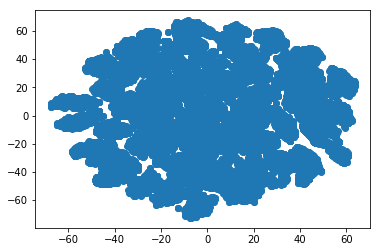

In [188]:
plt.scatter(TSNE_Results[:,0],TSNE_Results[:,1])

In [181]:
palette

array(['#e954c6', '#ac596b', '#b8d5ad', '#6bb300', '#f637f9', '#180f79',
       '#2c9694', '#94f3a8', '#a953d2', '#4f2417', '#4d822a', '#b5dade',
       '#a96cce', '#4bcd54', '#60e63f', '#6c473f', '#d4f8ea', '#5ae042',
       '#fae25e', '#a4efbe', '#7631f8', '#9cde26', '#82bcbc', '#b37b66',
       '#59c653', '#0e1c1e', '#e2cd07', '#6807d0', '#400ab1', '#de83ae',
       '#650360', '#064724', '#aedc2e', '#3feeb8', '#fcfcce', '#414240',
       '#0fbb37', '#e29638', '#2235d9', '#8a62f3', '#13d09f', '#ede255',
       '#6c982e', '#1e8e54', '#a03d7f', '#5d6624', '#f8cc6c', '#b2ee50',
       '#ef4751', '#26de3f', '#7785da', '#f7df8c', '#461464', '#e8abb0'],
      dtype='<U32')

In [6]:
# Converts the text labels into examples
encoder = LabelEncoder()
encoder.fit(df1['System'])
encoded_labels = encoder.transform(df1['System'])

# convert integers to dummy variables (i.e. one hot encoded)
labels = np_utils.to_categorical(encoded_labels)

# Collects the data for the samples
samples = df1.as_matrix(columns=df1.columns[1:38])

# Standard scaler to the raw data
samples_scaled=StandardScaler().fit_transform(samples)

In [9]:
# define 10-fold cross validation test harness
kfold = KFold(n_splits=, shuffle=True, random_state=10)
cvscores = []
for train, test in kfold.split(samples_scaled, labels):
    
    # establishes the model
    model = Sequential()
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model.add(Dense(64, input_dim=37))
    
    # Dense layer size 32
    model.add(Dense(32, activation='relu'))
    
    # Dense layer size 16
    model.add(Dense(16, activation='relu'))
    
    # Dense layer size 8
    model.add(Dense(8, activation='relu'))
    
    # Dense softmax layer for classification
    model.add(Dense(54, activation='softmax'))
    
    # Compiles the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fits the model using the training set
    model.fit(samples_scaled[train], labels[train], epochs=10000, batch_size=1000, verbose=0)
    
    # evaluates the model
    scores = model.evaluate(samples_scaled[test], labels[test], verbose=0)
    
    # prints the scores
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [49]:
model_big = Sequential()

# Dense layer size 64, # input dimensions based on the size of the input data
model_big.add(Dense(512, input_dim=37))

# Dense layer size 64, # input dimensions based on the size of the input data
model_big.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Dense layer size 64, # input dimensions based on the size of the input data
model_big.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Dense layer size 32
model_big.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Dense layer size 16
model_big.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Dense layer size 8
model_big.add(Dense(16, activation='relu'))

# Dense softmax layer for classification
model_big.add(Dense(54, activation='softmax'))

# Compiles the model
model_big.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# establishes the model
model = Sequential()

# Dense layer size 64, # input dimensions based on the size of the input data
model.add(Dense(128, input_dim=37))
model.add(Dropout(0.5))

# Dense layer size 32
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Dense layer size 16
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Dense layer size 8
model.add(Dense(8, activation='relu'))

# Dense softmax layer for classification
model.add(Dense(54, activation='softmax'))

# Compiles the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_big.optimizer.lr=1e-2
model_big.fit(samples_scaled, labels, epochs=5000, 
             batch_size=53091, validation_split=.2, shuffle=True)

Train on 42472 samples, validate on 10619 samples
Epoch 1/5000
42472/42472 [==============================] - 0s - loss: 0.0231 - acc: 0.9970 - val_loss: 15.2566 - val_acc: 0.0382
Epoch 2/5000
42472/42472 [==============================] - 0s - loss: 0.0231 - acc: 0.9972 - val_loss: 15.2566 - val_acc: 0.0380
Epoch 3/5000
42472/42472 [==============================] - 0s - loss: 0.0231 - acc: 0.9972 - val_loss: 15.2570 - val_acc: 0.0380
Epoch 4/5000
42472/42472 [==============================] - 0s - loss: 0.0231 - acc: 0.9971 - val_loss: 15.2566 - val_acc: 0.0380
Epoch 5/5000
42472/42472 [==============================] - 0s - loss: 0.0231 - acc: 0.9971 - val_loss: 15.2570 - val_acc: 0.0383
Epoch 6/5000
42472/42472 [==============================] - 0s - loss: 0.0230 - acc: 0.9971 - val_loss: 15.2572 - val_acc: 0.0384
Epoch 7/5000
42472/42472 [==============================] - 0s - loss: 0.0230 - acc: 0.9971 - val_loss: 15.2567 - val_acc: 0.0383
Epoch 8/5000
42472/42472 [==============

42472/42472 [==============================] - 0s - loss: 0.0202 - acc: 0.9976 - val_loss: 15.2589 - val_acc: 0.0380
Epoch 126/5000
42472/42472 [==============================] - 0s - loss: 0.0202 - acc: 0.9977 - val_loss: 15.2588 - val_acc: 0.0384
Epoch 127/5000
42472/42472 [==============================] - 0s - loss: 0.0201 - acc: 0.9978 - val_loss: 15.2587 - val_acc: 0.0384
Epoch 128/5000
42472/42472 [==============================] - 0s - loss: 0.0200 - acc: 0.9978 - val_loss: 15.2586 - val_acc: 0.0382
Epoch 129/5000
42472/42472 [==============================] - 0s - loss: 0.0201 - acc: 0.9977 - val_loss: 15.2590 - val_acc: 0.0385
Epoch 130/5000
42472/42472 [==============================] - 0s - loss: 0.0201 - acc: 0.9976 - val_loss: 15.2588 - val_acc: 0.0380
Epoch 131/5000
42472/42472 [==============================] - 0s - loss: 0.0200 - acc: 0.9977 - val_loss: 15.2588 - val_acc: 0.0387
Epoch 132/5000
42472/42472 [==============================] - 0s - loss: 0.0200 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0176 - acc: 0.9980 - val_loss: 15.2604 - val_acc: 0.0383
Epoch 250/5000
42472/42472 [==============================] - 0s - loss: 0.0176 - acc: 0.9981 - val_loss: 15.2605 - val_acc: 0.0381
Epoch 251/5000
42472/42472 [==============================] - 0s - loss: 0.0176 - acc: 0.9981 - val_loss: 15.2605 - val_acc: 0.0382
Epoch 252/5000
42472/42472 [==============================] - 0s - loss: 0.0175 - acc: 0.9981 - val_loss: 15.2606 - val_acc: 0.0380
Epoch 253/5000
42472/42472 [==============================] - 0s - loss: 0.0175 - acc: 0.9982 - val_loss: 15.2605 - val_acc: 0.0383
Epoch 254/5000
42472/42472 [==============================] - 0s - loss: 0.0175 - acc: 0.9982 - val_loss: 15.2611 - val_acc: 0.0382
Epoch 255/5000
42472/42472 [==============================] - 0s - loss: 0.0175 - acc: 0.9981 - val_loss: 15.2609 - val_acc: 0.0379
Epoch 256/5000
42472/42472 [==============================] - 0s - loss: 0.0175 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0155 - acc: 0.9985 - val_loss: 15.2624 - val_acc: 0.0377
Epoch 374/5000
42472/42472 [==============================] - 0s - loss: 0.0156 - acc: 0.9985 - val_loss: 15.2626 - val_acc: 0.0382
Epoch 375/5000
42472/42472 [==============================] - 0s - loss: 0.0155 - acc: 0.9984 - val_loss: 15.2626 - val_acc: 0.0381
Epoch 376/5000
42472/42472 [==============================] - 0s - loss: 0.0155 - acc: 0.9985 - val_loss: 15.2618 - val_acc: 0.0380
Epoch 377/5000
42472/42472 [==============================] - 0s - loss: 0.0155 - acc: 0.9984 - val_loss: 15.2626 - val_acc: 0.0383
Epoch 378/5000
42472/42472 [==============================] - 0s - loss: 0.0155 - acc: 0.9985 - val_loss: 15.2628 - val_acc: 0.0384
Epoch 379/5000
42472/42472 [==============================] - 0s - loss: 0.0154 - acc: 0.9984 - val_loss: 15.2625 - val_acc: 0.0380
Epoch 380/5000
42472/42472 [==============================] - 0s - loss: 0.0154 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0138 - acc: 0.9988 - val_loss: 15.2638 - val_acc: 0.0385
Epoch 498/5000
42472/42472 [==============================] - 0s - loss: 0.0138 - acc: 0.9987 - val_loss: 15.2639 - val_acc: 0.0384
Epoch 499/5000
42472/42472 [==============================] - 0s - loss: 0.0138 - acc: 0.9987 - val_loss: 15.2641 - val_acc: 0.0383
Epoch 500/5000
42472/42472 [==============================] - 0s - loss: 0.0137 - acc: 0.9988 - val_loss: 15.2639 - val_acc: 0.0385
Epoch 501/5000
42472/42472 [==============================] - 0s - loss: 0.0137 - acc: 0.9988 - val_loss: 15.2636 - val_acc: 0.0382
Epoch 502/5000
42472/42472 [==============================] - 0s - loss: 0.0137 - acc: 0.9988 - val_loss: 15.2638 - val_acc: 0.0385
Epoch 503/5000
42472/42472 [==============================] - 0s - loss: 0.0137 - acc: 0.9988 - val_loss: 15.2649 - val_acc: 0.0380
Epoch 504/5000
42472/42472 [==============================] - 0s - loss: 0.0136 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0121 - acc: 0.9989 - val_loss: 15.2651 - val_acc: 0.0393
Epoch 622/5000
42472/42472 [==============================] - 0s - loss: 0.0122 - acc: 0.9989 - val_loss: 15.2660 - val_acc: 0.0386
Epoch 623/5000
42472/42472 [==============================] - 0s - loss: 0.0123 - acc: 0.9989 - val_loss: 15.2660 - val_acc: 0.0389
Epoch 624/5000
42472/42472 [==============================] - 0s - loss: 0.0122 - acc: 0.9989 - val_loss: 15.2658 - val_acc: 0.0390
Epoch 625/5000
42472/42472 [==============================] - 0s - loss: 0.0121 - acc: 0.9989 - val_loss: 15.2652 - val_acc: 0.0390
Epoch 626/5000
42472/42472 [==============================] - 0s - loss: 0.0121 - acc: 0.9989 - val_loss: 15.2652 - val_acc: 0.0389
Epoch 627/5000
42472/42472 [==============================] - 0s - loss: 0.0122 - acc: 0.9990 - val_loss: 15.2661 - val_acc: 0.0382
Epoch 628/5000
42472/42472 [==============================] - 0s - loss: 0.0121 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0109 - acc: 0.9992 - val_loss: 15.2675 - val_acc: 0.0390
Epoch 746/5000
42472/42472 [==============================] - 0s - loss: 0.0109 - acc: 0.9992 - val_loss: 15.2673 - val_acc: 0.0390
Epoch 747/5000
42472/42472 [==============================] - 0s - loss: 0.0108 - acc: 0.9992 - val_loss: 15.2685 - val_acc: 0.0387
Epoch 748/5000
42472/42472 [==============================] - 0s - loss: 0.0108 - acc: 0.9991 - val_loss: 15.2686 - val_acc: 0.0389
Epoch 749/5000
42472/42472 [==============================] - 0s - loss: 0.0108 - acc: 0.9992 - val_loss: 15.2682 - val_acc: 0.0390
Epoch 750/5000
42472/42472 [==============================] - 0s - loss: 0.0108 - acc: 0.9991 - val_loss: 15.2674 - val_acc: 0.0387
Epoch 751/5000
42472/42472 [==============================] - 0s - loss: 0.0108 - acc: 0.9992 - val_loss: 15.2680 - val_acc: 0.0393
Epoch 752/5000
42472/42472 [==============================] - 0s - loss: 0.0108 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0098 - acc: 0.9993 - val_loss: 15.2711 - val_acc: 0.0391
Epoch 870/5000
42472/42472 [==============================] - 0s - loss: 0.0097 - acc: 0.9993 - val_loss: 15.2711 - val_acc: 0.0387
Epoch 871/5000
42472/42472 [==============================] - 0s - loss: 0.0098 - acc: 0.9992 - val_loss: 15.2700 - val_acc: 0.0394
Epoch 872/5000
42472/42472 [==============================] - 0s - loss: 0.0097 - acc: 0.9993 - val_loss: 15.2697 - val_acc: 0.0394
Epoch 873/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9993 - val_loss: 15.2708 - val_acc: 0.0387
Epoch 874/5000
42472/42472 [==============================] - 0s - loss: 0.0097 - acc: 0.9992 - val_loss: 15.2714 - val_acc: 0.0393
Epoch 875/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9993 - val_loss: 15.2706 - val_acc: 0.0390
Epoch 876/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.99

42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9994 - val_loss: 15.2733 - val_acc: 0.0390
Epoch 994/5000
42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9994 - val_loss: 15.2732 - val_acc: 0.0390
Epoch 995/5000
42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9994 - val_loss: 15.2722 - val_acc: 0.0395
Epoch 996/5000
42472/42472 [==============================] - 0s - loss: 0.0087 - acc: 0.9994 - val_loss: 15.2728 - val_acc: 0.0389
Epoch 997/5000
42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9994 - val_loss: 15.2721 - val_acc: 0.0386
Epoch 998/5000
42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9995 - val_loss: 15.2731 - val_acc: 0.0390
Epoch 999/5000
42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9994 - val_loss: 15.2733 - val_acc: 0.0387
Epoch 1000/5000
42472/42472 [==============================] - 0s - loss: 0.0086 - acc: 0.9

42472/42472 [==============================] - 0s - loss: 0.1005 - acc: 0.9678 - val_loss: 15.2532 - val_acc: 0.0367
Epoch 1116/5000
42472/42472 [==============================] - 0s - loss: 0.0991 - acc: 0.9685 - val_loss: 15.2526 - val_acc: 0.0373
Epoch 1117/5000
42472/42472 [==============================] - 0s - loss: 0.0979 - acc: 0.9690 - val_loss: 15.2531 - val_acc: 0.0368
Epoch 1118/5000
42472/42472 [==============================] - 0s - loss: 0.0966 - acc: 0.9700 - val_loss: 15.2541 - val_acc: 0.0363
Epoch 1119/5000
42472/42472 [==============================] - 0s - loss: 0.0955 - acc: 0.9706 - val_loss: 15.2544 - val_acc: 0.0367
Epoch 1120/5000
42472/42472 [==============================] - 0s - loss: 0.0942 - acc: 0.9712 - val_loss: 15.2541 - val_acc: 0.0370
Epoch 1121/5000
42472/42472 [==============================] - 0s - loss: 0.0932 - acc: 0.9716 - val_loss: 15.2534 - val_acc: 0.0367
Epoch 1122/5000
42472/42472 [==============================] - 0s - loss: 0.0920 - ac

42472/42472 [==============================] - 0s - loss: 0.0414 - acc: 0.9930 - val_loss: 15.2512 - val_acc: 0.0394
Epoch 1238/5000
42472/42472 [==============================] - 0s - loss: 0.0412 - acc: 0.9931 - val_loss: 15.2509 - val_acc: 0.0394
Epoch 1239/5000
42472/42472 [==============================] - 0s - loss: 0.0410 - acc: 0.9932 - val_loss: 15.2507 - val_acc: 0.0396
Epoch 1240/5000
42472/42472 [==============================] - 0s - loss: 0.0409 - acc: 0.9932 - val_loss: 15.2507 - val_acc: 0.0392
Epoch 1241/5000
42472/42472 [==============================] - 0s - loss: 0.0407 - acc: 0.9932 - val_loss: 15.2510 - val_acc: 0.0394
Epoch 1242/5000
42472/42472 [==============================] - 0s - loss: 0.0405 - acc: 0.9934 - val_loss: 15.2508 - val_acc: 0.0397
Epoch 1243/5000
42472/42472 [==============================] - 0s - loss: 0.0403 - acc: 0.9933 - val_loss: 15.2505 - val_acc: 0.0395
Epoch 1244/5000
42472/42472 [==============================] - 0s - loss: 0.0401 - ac

42472/42472 [==============================] - 0s - loss: 0.0267 - acc: 0.9968 - val_loss: 15.2536 - val_acc: 0.0398
Epoch 1360/5000
42472/42472 [==============================] - 0s - loss: 0.0266 - acc: 0.9968 - val_loss: 15.2541 - val_acc: 0.0399
Epoch 1361/5000
42472/42472 [==============================] - 0s - loss: 0.0265 - acc: 0.9970 - val_loss: 15.2542 - val_acc: 0.0399
Epoch 1362/5000
42472/42472 [==============================] - 0s - loss: 0.0264 - acc: 0.9969 - val_loss: 15.2537 - val_acc: 0.0398
Epoch 1363/5000
42472/42472 [==============================] - 0s - loss: 0.0264 - acc: 0.9969 - val_loss: 15.2537 - val_acc: 0.0400
Epoch 1364/5000
42472/42472 [==============================] - 0s - loss: 0.0263 - acc: 0.9969 - val_loss: 15.2541 - val_acc: 0.0402
Epoch 1365/5000
42472/42472 [==============================] - 0s - loss: 0.0262 - acc: 0.9970 - val_loss: 15.2539 - val_acc: 0.0397
Epoch 1366/5000
42472/42472 [==============================] - 0s - loss: 0.0261 - ac

42472/42472 [==============================] - 0s - loss: 0.0197 - acc: 0.9983 - val_loss: 15.2571 - val_acc: 0.0405
Epoch 1482/5000
42472/42472 [==============================] - 0s - loss: 0.0197 - acc: 0.9983 - val_loss: 15.2570 - val_acc: 0.0406
Epoch 1483/5000
42472/42472 [==============================] - 0s - loss: 0.0197 - acc: 0.9983 - val_loss: 15.2573 - val_acc: 0.0405
Epoch 1484/5000
42472/42472 [==============================] - 0s - loss: 0.0196 - acc: 0.9984 - val_loss: 15.2574 - val_acc: 0.0405
Epoch 1485/5000
42472/42472 [==============================] - 0s - loss: 0.0196 - acc: 0.9983 - val_loss: 15.2571 - val_acc: 0.0405
Epoch 1486/5000
42472/42472 [==============================] - 0s - loss: 0.0195 - acc: 0.9984 - val_loss: 15.2571 - val_acc: 0.0405
Epoch 1487/5000
42472/42472 [==============================] - 0s - loss: 0.0195 - acc: 0.9984 - val_loss: 15.2573 - val_acc: 0.0404
Epoch 1488/5000
42472/42472 [==============================] - 0s - loss: 0.0194 - ac

42472/42472 [==============================] - 0s - loss: 0.0157 - acc: 0.9989 - val_loss: 15.2599 - val_acc: 0.0404
Epoch 1604/5000
42472/42472 [==============================] - 0s - loss: 0.0157 - acc: 0.9989 - val_loss: 15.2599 - val_acc: 0.0407
Epoch 1605/5000
42472/42472 [==============================] - 0s - loss: 0.0157 - acc: 0.9990 - val_loss: 15.2598 - val_acc: 0.0406
Epoch 1606/5000
42472/42472 [==============================] - 0s - loss: 0.0156 - acc: 0.9989 - val_loss: 15.2600 - val_acc: 0.0406
Epoch 1607/5000
42472/42472 [==============================] - 0s - loss: 0.0156 - acc: 0.9989 - val_loss: 15.2600 - val_acc: 0.0406
Epoch 1608/5000
42472/42472 [==============================] - 0s - loss: 0.0156 - acc: 0.9990 - val_loss: 15.2598 - val_acc: 0.0408
Epoch 1609/5000
42472/42472 [==============================] - 0s - loss: 0.0156 - acc: 0.9990 - val_loss: 15.2595 - val_acc: 0.0405
Epoch 1610/5000
42472/42472 [==============================] - 0s - loss: 0.0155 - ac

42472/42472 [==============================] - 0s - loss: 0.0131 - acc: 0.9994 - val_loss: 15.2621 - val_acc: 0.0406
Epoch 1726/5000
42472/42472 [==============================] - 0s - loss: 0.0131 - acc: 0.9994 - val_loss: 15.2624 - val_acc: 0.0405
Epoch 1727/5000
42472/42472 [==============================] - 0s - loss: 0.0130 - acc: 0.9994 - val_loss: 15.2621 - val_acc: 0.0405
Epoch 1728/5000
42472/42472 [==============================] - 0s - loss: 0.0130 - acc: 0.9994 - val_loss: 15.2621 - val_acc: 0.0407
Epoch 1729/5000
42472/42472 [==============================] - 0s - loss: 0.0130 - acc: 0.9994 - val_loss: 15.2626 - val_acc: 0.0406
Epoch 1730/5000
42472/42472 [==============================] - 0s - loss: 0.0130 - acc: 0.9994 - val_loss: 15.2623 - val_acc: 0.0407
Epoch 1731/5000
42472/42472 [==============================] - 0s - loss: 0.0130 - acc: 0.9994 - val_loss: 15.2625 - val_acc: 0.0406
Epoch 1732/5000
42472/42472 [==============================] - 0s - loss: 0.0130 - ac

42472/42472 [==============================] - 0s - loss: 0.0112 - acc: 0.9995 - val_loss: 15.2639 - val_acc: 0.0404
Epoch 1848/5000
42472/42472 [==============================] - 0s - loss: 0.0111 - acc: 0.9995 - val_loss: 15.2637 - val_acc: 0.0404
Epoch 1849/5000
42472/42472 [==============================] - 0s - loss: 0.0111 - acc: 0.9995 - val_loss: 15.2639 - val_acc: 0.0403
Epoch 1850/5000
42472/42472 [==============================] - 0s - loss: 0.0111 - acc: 0.9995 - val_loss: 15.2639 - val_acc: 0.0405
Epoch 1851/5000
42472/42472 [==============================] - 0s - loss: 0.0111 - acc: 0.9995 - val_loss: 15.2642 - val_acc: 0.0404
Epoch 1852/5000
42472/42472 [==============================] - 0s - loss: 0.0111 - acc: 0.9995 - val_loss: 15.2643 - val_acc: 0.0404
Epoch 1853/5000
42472/42472 [==============================] - 0s - loss: 0.0111 - acc: 0.9996 - val_loss: 15.2637 - val_acc: 0.0405
Epoch 1854/5000
42472/42472 [==============================] - 0s - loss: 0.0110 - ac

42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2661 - val_acc: 0.0402
Epoch 1970/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2668 - val_acc: 0.0401
Epoch 1971/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2665 - val_acc: 0.0400
Epoch 1972/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2665 - val_acc: 0.0401
Epoch 1973/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2665 - val_acc: 0.0401
Epoch 1974/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2666 - val_acc: 0.0400
Epoch 1975/5000
42472/42472 [==============================] - 0s - loss: 0.0096 - acc: 0.9996 - val_loss: 15.2665 - val_acc: 0.0402
Epoch 1976/5000
42472/42472 [==============================] - 0s - loss: 0.0095 - ac

42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9997 - val_loss: 15.2689 - val_acc: 0.0398
Epoch 2092/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9996 - val_loss: 15.2688 - val_acc: 0.0399
Epoch 2093/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9997 - val_loss: 15.2687 - val_acc: 0.0400
Epoch 2094/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9997 - val_loss: 15.2689 - val_acc: 0.0401
Epoch 2095/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9997 - val_loss: 15.2683 - val_acc: 0.0399
Epoch 2096/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9997 - val_loss: 15.2685 - val_acc: 0.0398
Epoch 2097/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - acc: 0.9997 - val_loss: 15.2691 - val_acc: 0.0399
Epoch 2098/5000
42472/42472 [==============================] - 0s - loss: 0.0084 - ac

42472/42472 [==============================] - 0s - loss: 0.0075 - acc: 0.9998 - val_loss: 15.2712 - val_acc: 0.0398
Epoch 2214/5000
42472/42472 [==============================] - 0s - loss: 0.0075 - acc: 0.9998 - val_loss: 15.2710 - val_acc: 0.0399
Epoch 2215/5000
42472/42472 [==============================] - 0s - loss: 0.0075 - acc: 0.9997 - val_loss: 15.2714 - val_acc: 0.0399
Epoch 2216/5000
42472/42472 [==============================] - 0s - loss: 0.0075 - acc: 0.9998 - val_loss: 15.2713 - val_acc: 0.0398
Epoch 2217/5000
42472/42472 [==============================] - 0s - loss: 0.0075 - acc: 0.9998 - val_loss: 15.2716 - val_acc: 0.0398
Epoch 2218/5000
42472/42472 [==============================] - 0s - loss: 0.0075 - acc: 0.9997 - val_loss: 15.2720 - val_acc: 0.0401
Epoch 2219/5000
42472/42472 [==============================] - 0s - loss: 0.0074 - acc: 0.9997 - val_loss: 15.2721 - val_acc: 0.0398
Epoch 2220/5000
42472/42472 [==============================] - 0s - loss: 0.0074 - ac

42472/42472 [==============================] - 0s - loss: 0.0067 - acc: 0.9998 - val_loss: 15.2737 - val_acc: 0.0400
Epoch 2336/5000
42472/42472 [==============================] - 0s - loss: 0.0067 - acc: 0.9998 - val_loss: 15.2742 - val_acc: 0.0398
Epoch 2337/5000
42472/42472 [==============================] - 0s - loss: 0.0067 - acc: 0.9998 - val_loss: 15.2739 - val_acc: 0.0399
Epoch 2338/5000
42472/42472 [==============================] - 0s - loss: 0.0066 - acc: 0.9998 - val_loss: 15.2742 - val_acc: 0.0400
Epoch 2339/5000
42472/42472 [==============================] - 0s - loss: 0.0066 - acc: 0.9998 - val_loss: 15.2741 - val_acc: 0.0397
Epoch 2340/5000
42472/42472 [==============================] - 0s - loss: 0.0067 - acc: 0.9998 - val_loss: 15.2739 - val_acc: 0.0399
Epoch 2341/5000
42472/42472 [==============================] - 0s - loss: 0.0066 - acc: 0.9998 - val_loss: 15.2740 - val_acc: 0.0399
Epoch 2342/5000
42472/42472 [==============================] - 0s - loss: 0.0066 - ac

42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2762 - val_acc: 0.0401
Epoch 2458/5000
42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2757 - val_acc: 0.0399
Epoch 2459/5000
42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2761 - val_acc: 0.0396
Epoch 2460/5000
42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2762 - val_acc: 0.0399
Epoch 2461/5000
42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2761 - val_acc: 0.0397
Epoch 2462/5000
42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2763 - val_acc: 0.0396
Epoch 2463/5000
42472/42472 [==============================] - 0s - loss: 0.0060 - acc: 0.9998 - val_loss: 15.2760 - val_acc: 0.0402
Epoch 2464/5000
42472/42472 [==============================] - 0s - loss: 0.0059 - ac

42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2783 - val_acc: 0.0396
Epoch 2580/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2783 - val_acc: 0.0398
Epoch 2581/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2781 - val_acc: 0.0399
Epoch 2582/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2777 - val_acc: 0.0399
Epoch 2583/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2780 - val_acc: 0.0397
Epoch 2584/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2782 - val_acc: 0.0397
Epoch 2585/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - acc: 0.9998 - val_loss: 15.2784 - val_acc: 0.0398
Epoch 2586/5000
42472/42472 [==============================] - 0s - loss: 0.0054 - ac

42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9999 - val_loss: 15.2806 - val_acc: 0.0395
Epoch 2702/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9999 - val_loss: 15.2808 - val_acc: 0.0395
Epoch 2703/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9999 - val_loss: 15.2808 - val_acc: 0.0396
Epoch 2704/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9999 - val_loss: 15.2801 - val_acc: 0.0396
Epoch 2705/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9998 - val_loss: 15.2801 - val_acc: 0.0397
Epoch 2706/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9999 - val_loss: 15.2805 - val_acc: 0.0396
Epoch 2707/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - acc: 0.9998 - val_loss: 15.2804 - val_acc: 0.0393
Epoch 2708/5000
42472/42472 [==============================] - 0s - loss: 0.0049 - ac

42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2821 - val_acc: 0.0395
Epoch 2824/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2820 - val_acc: 0.0396
Epoch 2825/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2823 - val_acc: 0.0398
Epoch 2826/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2829 - val_acc: 0.0395
Epoch 2827/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2823 - val_acc: 0.0396
Epoch 2828/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2822 - val_acc: 0.0396
Epoch 2829/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - acc: 0.9999 - val_loss: 15.2825 - val_acc: 0.0396
Epoch 2830/5000
42472/42472 [==============================] - 0s - loss: 0.0045 - ac

42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2843 - val_acc: 0.0396
Epoch 2946/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2843 - val_acc: 0.0396
Epoch 2947/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2844 - val_acc: 0.0396
Epoch 2948/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2847 - val_acc: 0.0396
Epoch 2949/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2845 - val_acc: 0.0397
Epoch 2950/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2840 - val_acc: 0.0398
Epoch 2951/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - acc: 0.9999 - val_loss: 15.2841 - val_acc: 0.0396
Epoch 2952/5000
42472/42472 [==============================] - 0s - loss: 0.0041 - ac

42472/42472 [==============================] - 0s - loss: 0.0038 - acc: 0.9999 - val_loss: 15.2863 - val_acc: 0.0396
Epoch 3068/5000
42472/42472 [==============================] - 0s - loss: 0.0038 - acc: 0.9999 - val_loss: 15.2859 - val_acc: 0.0399
Epoch 3069/5000
42472/42472 [==============================] - 0s - loss: 0.0039 - acc: 0.9999 - val_loss: 15.2858 - val_acc: 0.0397
Epoch 3070/5000
42472/42472 [==============================] - 0s - loss: 0.0038 - acc: 0.9999 - val_loss: 15.2862 - val_acc: 0.0396
Epoch 3071/5000
42472/42472 [==============================] - 0s - loss: 0.0038 - acc: 0.9999 - val_loss: 15.2861 - val_acc: 0.0398
Epoch 3072/5000
42472/42472 [==============================] - 0s - loss: 0.0038 - acc: 0.9999 - val_loss: 15.2863 - val_acc: 0.0398
Epoch 3073/5000
42472/42472 [==============================] - 0s - loss: 0.0038 - acc: 0.9999 - val_loss: 15.2861 - val_acc: 0.0397
Epoch 3074/5000
42472/42472 [==============================] - 0s - loss: 0.0038 - ac

42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2877 - val_acc: 0.0399
Epoch 3190/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2880 - val_acc: 0.0397
Epoch 3191/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2880 - val_acc: 0.0396
Epoch 3192/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2882 - val_acc: 0.0399
Epoch 3193/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2880 - val_acc: 0.0396
Epoch 3194/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2879 - val_acc: 0.0397
Epoch 3195/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - acc: 0.9999 - val_loss: 15.2880 - val_acc: 0.0399
Epoch 3196/5000
42472/42472 [==============================] - 0s - loss: 0.0035 - ac

42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2897 - val_acc: 0.0392
Epoch 3312/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2891 - val_acc: 0.0397
Epoch 3313/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2894 - val_acc: 0.0394
Epoch 3314/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2889 - val_acc: 0.0393
Epoch 3315/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2891 - val_acc: 0.0398
Epoch 3316/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2894 - val_acc: 0.0393
Epoch 3317/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - acc: 0.9999 - val_loss: 15.2898 - val_acc: 0.0395
Epoch 3318/5000
42472/42472 [==============================] - 0s - loss: 0.0033 - ac

42472/42472 [==============================] - 0s - loss: 0.0030 - acc: 0.9999 - val_loss: 15.2913 - val_acc: 0.0393
Epoch 3434/5000
42472/42472 [==============================] - 0s - loss: 0.0030 - acc: 0.9999 - val_loss: 15.2917 - val_acc: 0.0396
Epoch 3435/5000
42472/42472 [==============================] - 0s - loss: 0.0031 - acc: 0.9999 - val_loss: 15.2913 - val_acc: 0.0393
Epoch 3436/5000
42472/42472 [==============================] - 0s - loss: 0.0030 - acc: 0.9999 - val_loss: 15.2913 - val_acc: 0.0392
Epoch 3437/5000
42472/42472 [==============================] - 0s - loss: 0.0030 - acc: 0.9999 - val_loss: 15.2916 - val_acc: 0.0395
Epoch 3438/5000
42472/42472 [==============================] - 0s - loss: 0.0030 - acc: 0.9999 - val_loss: 15.2910 - val_acc: 0.0392
Epoch 3439/5000
42472/42472 [==============================] - 0s - loss: 0.0030 - acc: 0.9999 - val_loss: 15.2914 - val_acc: 0.0392
Epoch 3440/5000
42472/42472 [==============================] - 0s - loss: 0.0030 - ac

42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2933 - val_acc: 0.0394
Epoch 3556/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2937 - val_acc: 0.0390
Epoch 3557/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2932 - val_acc: 0.0393
Epoch 3558/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2934 - val_acc: 0.0391
Epoch 3559/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2931 - val_acc: 0.0393
Epoch 3560/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2933 - val_acc: 0.0392
Epoch 3561/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - acc: 0.9999 - val_loss: 15.2940 - val_acc: 0.0392
Epoch 3562/5000
42472/42472 [==============================] - 0s - loss: 0.0028 - ac

In [24]:
samples_scaled.shape

(53091, 37)

In [8]:
# define 10-fold cross validation test harness
kfold = KFold(n_splits=10, shuffle=True, random_state=10)
cvscores = []
for train, test in kfold.split(samples_scaled, labels):
    
    # establishes the model
    model = Sequential()
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model.add(Dense(128, input_dim=37))
    
    # Dense layer size 32
    model.add(Dense(64, activation='relu'))
    
    # Dense layer size 16
    model.add(Dense(32, activation='relu'))
    
    # Dense layer size 8
    model.add(Dense(16, activation='relu'))
    
    # Dense softmax layer for classification
    model.add(Dense(4, activation='softmax'))
    
    # Compiles the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fits the model using the training set
    model.fit(samples_scaled[train], labels[train], epochs=1000, batch_size=1000, verbose=0)
    
    # evaluates the model
    scores = model.evaluate(samples_scaled[test], labels[test], verbose=0)
    
    # prints the scores
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

acc: 64.07%
acc: 60.37%
acc: 62.59%
acc: 63.52%
acc: 67.22%
acc: 64.44%
acc: 64.44%
acc: 64.81%
acc: 63.70%
acc: 64.81%


In [ ]:
model.summary()

In [ ]:
scores

In [33]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
layer_output = get_3rd_layer_output([samples_scaled])[0]

In [34]:
layer_output

array([[ 11.99063587,   0.        ,   3.07142401, ...,   2.63964105,
         11.01639843,  15.28126812],
       [ 13.69363499,   1.90249193,   2.63317513, ...,   8.4369936 ,
         14.26471043,  18.65962219],
       [ 15.96522713,   2.08975792,   3.47117329, ...,   6.78340816,
         14.8020916 ,  18.36964035],
       ..., 
       [ 10.99110603,   0.        ,   4.51517057, ...,   8.86768532,
          9.90884972,  14.0201025 ],
       [  1.27252722,   4.37794781,   9.00692654, ...,   1.83869922,
          6.39203024,   7.6665802 ],
       [  7.38500929,   4.12500525,   7.39518929, ...,   7.54722309,
         10.89405537,  10.33331013]], dtype=float32)

In [45]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)

%time
TSNE_Results = TSNE_model.fit_transform(layer_output)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 36.7 µs


In [81]:
tsne_df = pd.DataFrame(TSNE_Results, columns=['Component 1', 'Component 2'], index=df1.index)

In [82]:
data_all = pd.concat([df1, tsne_df], axis=1)

In [83]:
category = 'System'

category_items = data_all[category].unique()
palette = brewer['Set3'][len(category_items) + 1]
colormap = dict(zip(category_items, palette))
data_all['color'] = data_all[category].map(colormap)

In [84]:
data_all.head

<bound method NDFrame.head of       System  lattice_a  lattice_b  lattice_c       alfa       beta  \
0     PbTiO3   3.527159   4.054563   3.602487  91.497245  91.347537   
1     PbTiO3   4.370598   4.130360   3.765074  90.682515  89.993410   
2     PbTiO3   4.120714   4.140331   4.419631  89.804943  90.637325   
3     PbTiO3   4.353036   3.584981   4.159995  92.044500  85.343010   
4     PbTiO3   4.079323   4.360621   4.015184  87.209892  89.070987   
5     PbTiO3   4.170776   4.204498   4.068904  89.329520  92.828304   
6     PbTiO3   4.299240   4.265504   4.405869  84.888087  89.647767   
7     PbTiO3   4.183527   4.221944   4.467955  86.181910  91.991502   
8     PbTiO3   4.364258   3.954661   4.365109  94.877078  93.077299   
9     PbTiO3   4.323906   3.761407   4.442354  90.071386  86.630310   
10    PbTiO3   4.245876   3.626097   4.200420  85.361726  88.848949   
11    PbTiO3   3.561808   4.166721   3.924811  91.782341  89.779342   
12    PbTiO3   3.688416   4.387753   4.075468  

In [92]:
source = ColumnDataSource(data_all[:])

hover = HoverTool(tooltips=[(column, '@' + column) for column in ['lattice_a', 'lattice_b', 'lattice_c', 'alfa', 'beta', 'gama','Energy']])

tools = [hover, WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), TapTool(), SaveTool()]

p = figure(
    tools=tools,
    #title=title,
    plot_width=800,
    plot_height=800,
    toolbar_location='below',
    toolbar_sticky=False, )

p.circle(
    x='Component 1',
    y='Component 2',
    source=source,
    size=10,
    line_color='#333333',
    line_width=0.5,
    fill_alpha=0.8,
    color='color',
    legend=category)

show(p)

In [248]:
Systems = ['PbTiO3','PbZrO3','KNbO3','NaVO3']
Pand_Name = ['Index','PbTiO3','PbZrO3','KNbO3','NaVO3']


data_sort = np.zeros((4,1000))
for i, name in enumerate(Systems):
    data_sort[i] = data_all['Energy'][data_all['System']==name][0:1000].values

In [266]:
sorted_df = pd.DataFrame(data_sort[:,data_sorted[0]].T,columns=Pand_Name[1:5])
sorted_df = pd.merge(sorted_df, data_all[0:1000], right_index=True, left_index=True)
index_df = pd.DataFrame({'Index':np.linspace(0,999,1000)})
sorted_df.sort_values('PbTiO3')
sorted_df = sorted_df.join(index_df)

In [268]:
source = ColumnDataSource(sorted_df)

hover = HoverTool(tooltips=[(column, '@' + column) for column in ['lattice_a', 'lattice_b', 'lattice_c', 'alfa', 'beta', 'gama','Energy']])

tools = [hover, WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), TapTool(), SaveTool()]

p = figure(
    tools=tools,
    #title=title,
    plot_width=800,
    plot_height=800,
    toolbar_location='below',
    toolbar_sticky=False, )
for i, name in enumerate(Systems):
    p.circle(
        x='Index',
        y=name,
        source=source,
        size=8,
        line_color='#333333',
        line_width=0.5,
        fill_alpha=0.8,
        color=palette[i],
        legend=name+' ')

#p.circle(
#    x='Index',
#    y='PbZrO3',
#    source=source,
#    size=3,
#    line_color='#333333',
#    line_width=0.5,
#    fill_alpha=0.8,
#    color='color',
#    legend='PbZrO3 ')

show(p)

In [265]:
sorted_df.head()

PbTiO3     PbZrO3      KNbO3      NaVO3  System  lattice_a  lattice_b  \
0 -41.029858 -42.167970 -41.519821 -37.335520  PbTiO3   3.527159   4.054563   
1 -40.976010 -41.244161 -41.670973 -38.186510  PbTiO3   4.370598   4.130360   
2 -40.705837 -39.026317 -40.816146 -38.639270  PbTiO3   4.120714   4.140331   
3 -40.673351 -41.530390 -41.428738 -37.677847  PbTiO3   4.353036   3.584981   
4 -40.642440 -40.946862 -41.459112 -37.906383  PbTiO3   4.079323   4.360621   

   lattice_c       alfa       beta   ...        F O3z  sxx (eV/A^2)       syy  \
0   3.602487  91.497245  91.347537   ...     1.418352     -0.381783 -0.150719   
1   3.765074  90.682515  89.993410   ...     0.721013     -0.172119 -0.001144   
2   4.419631  89.804943  90.637325   ...    -1.413342     -0.008073 -0.063080   
3   4.159995  92.044500  85.343010   ...     0.834559      0.118708 -0.309729   
4   4.015184  87.209892  89.070987   ...     1.809286     -0.057939  0.059134   

        szz       syz       sxz       sxy  Component 1  Component 2    color  
0 -0.252876 -0.026877 -0.016682  0.074918    -5.539741     7.999241  #8dd3c7  
1 -0.829988 -0.086051 -0.267021 -0.075984     7.770895   -44.795109  #8dd3c7  
2 -0.024209  0.024215  0.005912  0.061928    44.540108   -19.370371  #8dd3c7  
3  0.077841 -0.027511  0.058423  0.008114     9.862336    15.983433  #8dd3c7  
4 -0.195821 -0.020195 -0.051371  0.015614    15.660117     0.651505  #8dd3c7  

[5 rows x 51 columns]

In [246]:
data_all[1:1001].values[data_sorted]

array([[['PbTiO3', 4.22458092522, 4.25652415621, ..., -2.1702046394348145,
         38.283939361572266, '#8dd3c7'],
        ['PbTiO3', 4.28775339367, 4.43457381599, ..., -40.29657745361328,
         28.679027557373047, '#8dd3c7'],
        ['PbTiO3', 3.58512266093, 3.8729070281, ..., -31.633647918701172,
         -38.982479095458984, '#8dd3c7'],
        ..., 
        ['PbTiO3', 3.76898879175, 4.16145248192, ..., 6.740270137786865,
         9.17530345916748, '#8dd3c7'],
        ['PbTiO3', 3.692157348, 4.15223447932, ..., -4.6363091468811035,
         -45.129276275634766, '#8dd3c7'],
        ['PbTiO3', 3.96680512783, 3.79105143659, ..., 30.379743576049805,
         14.391526222229004, '#8dd3c7']],

       [['PbTiO3', 4.22458092522, 4.25652415621, ..., -2.1702046394348145,
         38.283939361572266, '#8dd3c7'],
        ['PbTiO3', 3.54499643112, 3.84342507158, ..., -42.112022399902344,
         15.836984634399414, '#8dd3c7'],
        ['PbTiO3', 4.12688303606, 4.25186402482, ..., 10.782518

In [247]:
df5 = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150], columns=['A'])
df5.sort_index(inplace=True)
print(df5.to_string())

     A
1    4
29   2
100  1
150  5
234  3


In [ ]:
# define 10-fold cross validation test harness
kfold = KFold(n_splits=10, shuffle=True, random_state=10)
cvscores = []
for train, test in kfold.split(samples_scaled, labels):
    
    # establishes the model
    model_big = Sequential()
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model_big.add(Dense(128, input_dim=37))
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model_big.add(Dense(128, activation='relu'))
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model_big.add(Dense(64, activation='relu'))
    
    # Dense layer size 32
    model_big.add(Dense(32, activation='relu'))
    
    # Dense layer size 16
    model_big.add(Dense(16, activation='relu'))
    
    # Dense layer size 8
    model_big.add(Dense(8, activation='relu'))
    
    # Dense softmax layer for classification
    model_big.add(Dense(4, activation='softmax'))
    
    # Compiles the model
    model_big.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fits the model using the training set
    model_big.fit(samples_scaled[train], labels[train], epochs=10000, batch_size=1000, verbose=0)
    
    # evaluates the model
    scores = model_big.evaluate(samples_scaled[test], labels[test], verbose=0)
    
    # prints the scores
    print("%s: %.2f%%" % (model_big.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

acc: 67.22%


In [270]:
cvscores

[67.222222398828578,
 61.481481525633072,
 67.962963227872493,
 66.666667019879384,
 64.444444709353974,
 65.370370370370367,
 68.888889065495235,
 70.740740873195506,
 64.81481507972434,
 68.888889065495235]

In [273]:
model_big.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 128)               4864      
_________________________________________________________________
dense_175 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_176 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_177 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_178 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_179 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_180 (Dense)            (None, 4)                 36        
Total para

In [277]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model_big.layers[0].input],
                                  [model_big.layers[5].output])
layer_output = get_3rd_layer_output([samples_scaled])[0]

In [278]:
from sklearn.manifold import TSNE

TSNE_model_2 = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=2000)

%time
TSNE_Results_2 = TSNE_model.fit_transform(layer_output)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 35.8 µs


In [284]:
tsne_df = pd.DataFrame(TSNE_Results_2, columns=['Component 1', 'Component 2'], index=df1.index)
data_all = pd.concat([df1, tsne_df], axis=1)
category = 'System'

category_items = data_all[category].unique()
palette = brewer['Set3'][len(category_items) + 1]
colormap = dict(zip(category_items, palette))
data_all['color'] = data_all[category].map(colormap)

In [285]:
source = ColumnDataSource(data_all[:])

hover = HoverTool(tooltips=[(column, '@' + column) for column in ['lattice_a', 'lattice_b', 'lattice_c', 'alfa', 'beta', 'gama','Energy']])

tools = [hover, WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), TapTool(), SaveTool()]

p = figure(
    tools=tools,
    #title=title,
    plot_width=800,
    plot_height=800,
    toolbar_location='below',
    toolbar_sticky=False, )

p.circle(
    x='Component 1',
    y='Component 2',
    source=source,
    size=10,
    line_color='#333333',
    line_width=0.5,
    fill_alpha=0.8,
    color='color',
    legend=category)

show(p)

In [283]:
data_all.head()

System  lattice_a  lattice_b  lattice_c       alfa       beta       gama  \
0  PbTiO3   3.527159   4.054563   3.602487  91.497245  91.347537  88.623575   
1  PbTiO3   4.370598   4.130360   3.765074  90.682515  89.993410  92.223075   
2  PbTiO3   4.120714   4.140331   4.419631  89.804943  90.637325  88.648834   
3  PbTiO3   4.353036   3.584981   4.159995  92.044500  85.343010  89.567498   
4  PbTiO3   4.079323   4.360621   4.015184  87.209892  89.070987  87.159276   

   Ax (Cartesian)  Ay  Az     ...          F O3y     F O3z  sxx (eV/A^2)  \
0               0   0   0     ...       0.386212  1.418352     -0.381783   
1               0   0   0     ...       1.354517  0.721013     -0.172119   
2               0   0   0     ...      -4.735835 -1.413342     -0.008073   
3               0   0   0     ...      -0.227952  0.834559      0.118708   
4               0   0   0     ...       0.136345  1.809286     -0.057939   

        syy       szz       syz       sxz       sxy  Component 1  Component 2  
0 -0.150719 -0.252876 -0.026877 -0.016682  0.074918   -29.050909   -20.400629  
1 -0.001144 -0.829988 -0.086051 -0.267021 -0.075984   -36.441032    39.564632  
2 -0.063080 -0.024209  0.024215  0.005912  0.061928   -40.561584    45.855877  
3 -0.309729  0.077841 -0.027511  0.058423  0.008114   -34.245956    26.717941  
4  0.059134 -0.195821 -0.020195 -0.051371  0.015614   -34.029930    17.004997  

[5 rows x 46 columns]

In [ ]:
# define 10-fold cross validation test harness
kfold = KFold(n_splits=10, shuffle=True, random_state=10)
cvscores = []
for train, test in kfold.split(samples_scaled, labels):
    
    # establishes the model
    model_2 = Sequential()
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model_2.add(Dense(128, input_dim=37))
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model_2.add(Dense(128, activation='relu'))
    
    # Dense layer size 64, # input dimensions based on the size of the input data
    model_2.add(Dense(64, activation='relu'))
    
    # Dense layer size 32
    model_2.add(Dense(32, activation='relu'))
    
    # Dense layer size 16
    model_2.add(Dense(16, activation='relu'))
    
    # Dense layer size 8
    model_2.add(Dense(2, activation='linear'))
    
    # Dense softmax layer for classification
    model_2.add(Dense(4, activation='softmax'))
    
    # Compiles the model
    model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fits the model using the training set
    model_2.fit(samples_scaled[train], labels[train], epochs=10000, batch_size=1000, verbose=0)
    
    # evaluates the model
    scores = model_2.evaluate(samples_scaled[test], labels[test], verbose=0)
    
    # prints the scores
    print("%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

acc: 68.89%
acc: 62.59%


In [288]:
cvscores

[68.888889153798416,
 62.592592504289414,
 59.444444621050799,
 57.777778130990484,
 57.592592769198944,
 57.407407407407405,
 63.703703836158468,
 67.407407539862177,
 57.962963183720909,
 68.88888933040478]

In [289]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model_2.layers[0].input],
                                  [model_2.layers[5].output])
layer_output = get_3rd_layer_output([samples_scaled])[0]

In [291]:
tsne_df = pd.DataFrame(layer_output, columns=['Component 1', 'Component 2'], index=df1.index)
data_all = pd.concat([df1, tsne_df], axis=1)
category = 'System'

category_items = data_all[category].unique()
palette = brewer['Set3'][len(category_items) + 1]
colormap = dict(zip(category_items, palette))
data_all['color'] = data_all[category].map(colormap)

In [292]:
source = ColumnDataSource(data_all[:])

hover = HoverTool(tooltips=[(column, '@' + column) for column in ['lattice_a', 'lattice_b', 'lattice_c', 'alfa', 'beta', 'gama','Energy']])

tools = [hover, WheelZoomTool(), PanTool(), BoxZoomTool(), ResetTool(), TapTool(), SaveTool()]

p = figure(
    tools=tools,
    #title=title,
    plot_width=800,
    plot_height=800,
    toolbar_location='below',
    toolbar_sticky=False, )

p.circle(
    x='Component 1',
    y='Component 2',
    source=source,
    size=10,
    line_color='#333333',
    line_width=0.5,
    fill_alpha=0.8,
    color='color',
    legend=category)

show(p)

In [293]:
model_2.save('model_2d_linear')

In [297]:
model.save('model_1')

In [298]:
model_big.save('model_big')

In [299]:
np.savez_compressed('all_data')